# Textmining 

## Setup

In [2]:
import pandas as pd
import altair as alt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer

import warnings

In [3]:
# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data
### Data Import

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/louisawalter/DS-Homework1/main/data/raw/webscraping.csv", index_col=0)

In [5]:
df

,Titel,URL,Thema,Autor,Datum,Artikeltext,Tags
0,The Midterms Made State Governments Bluer,https://fivethirtyeight.com/features/2022-gove...,2022 Election,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","Abortion bans, right-to-work laws, voting rest...","2022 Election, 2022 Midterms, 2022 Governors E..."


In [6]:
df["Artikeltext_lower"] = df["Artikeltext"].astype(str).str.lower()

In [7]:
df

,Titel,URL,Thema,Autor,Datum,Artikeltext,Tags,Artikeltext_lower
0,The Midterms Made State Governments Bluer,https://fivethirtyeight.com/features/2022-gove...,2022 Election,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","Abortion bans, right-to-work laws, voting rest...","2022 Election, 2022 Midterms, 2022 Governors E...","abortion bans, right-to-work laws, voting rest..."


## Text mining data preparation
### Tokenization

In [8]:
regexp = RegexpTokenizer('\w+') # use regular expression to match (multiple) word characters and numbers

df['Artikeltext_token']=df['Artikeltext_lower'].apply(regexp.tokenize) # insert the data column and the regular expression pattern

### Stopwords

In [9]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [10]:
my_stopwords = ['https', 'co']
stopwords.extend(my_stopwords)

In [11]:
df['Artikeltext_token_s'] = df['Artikeltext_token'].apply(lambda x: [i for i in x if i not in stopwords])

In [12]:
df

,Titel,URL,Thema,Autor,Datum,Artikeltext,Tags,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s
0,The Midterms Made State Governments Bluer,https://fivethirtyeight.com/features/2022-gove...,2022 Election,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","Abortion bans, right-to-work laws, voting rest...","2022 Election, 2022 Midterms, 2022 Governors E...","abortion bans, right-to-work laws, voting rest...","[abortion, bans, right, to, work, laws, voting...","[abortion, bans, right, work, laws, voting, re..."


### Transform data and remove infrequent words

In [13]:
df['Artikeltext_si'] = df['Artikeltext_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

### Lemmatization

In [14]:
# create an object called wordnet_lem of the WordNetLemmatizer() function.
wordnet_lem = WordNetLemmatizer()

In [15]:
# create a new column called text_sil (l for lemmatization) and apply the function .lemmatize
df['Artikeltext_sil'] = df['Artikeltext_si'].apply(wordnet_lem.lemmatize)

# we check wether there are any differences in the two columns
check_difference = (df['Artikeltext_sil'] == df['Artikeltext_sil'])

# sum all True and False values
check_difference.value_counts()

True    1
Name: Artikeltext_sil, dtype: int64

## Data visualization
### Word cloud

In [16]:
# combine all words in one object called all_words
all_words = ' '.join([i for i in df["Artikeltext_sil"]])

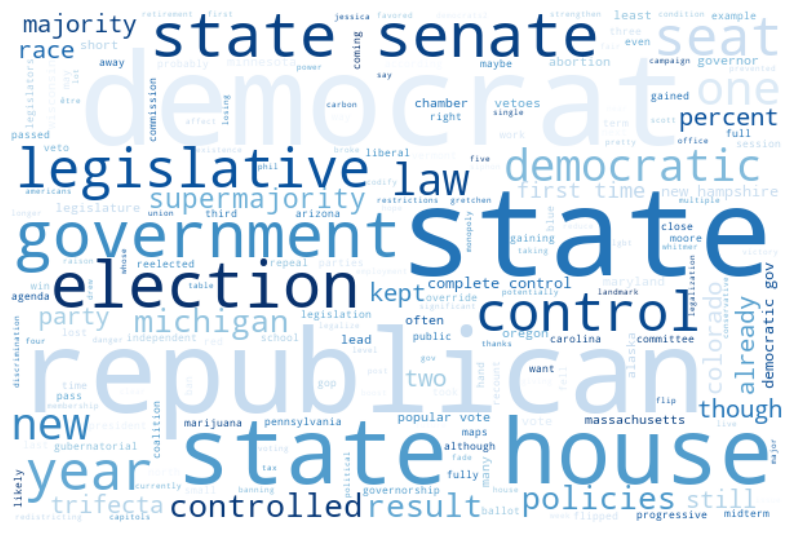

In [17]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                     background_color="white",
                     colormap="Blues").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

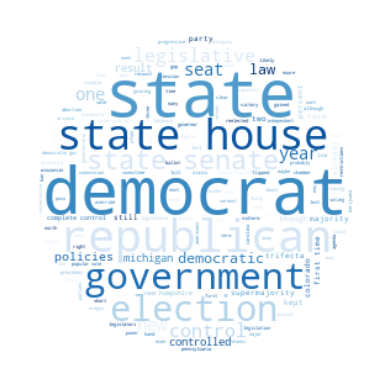

In [18]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask, colormap="Blues")
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [19]:
# tokenize the words
words_tokens = nltk.word_tokenize(all_words)

# use the function FreqDist and save the result as fd
fd = FreqDist(words_tokens)

In [20]:
fd

FreqDist({'state': 48, 'democrats': 28, 'republicans': 17, 'house': 14, 'control': 13, 'new': 10, 'democratic': 10, 'senate': 10, 'legislative': 9, 'one': 7, ...})

### Most common words

In [21]:
# show the 5 most common words as table
fd.tabulate(5)

      state   democrats republicans       house     control 
         48          28          17          14          13 


### Plot common words

In [22]:
# Obtain top 10 words
top_10 = fd.most_common(10)

top_10

[('state', 48),
 ('democrats', 28),
 ('republicans', 17),
 ('house', 14),
 ('control', 13),
 ('new', 10),
 ('democratic', 10),
 ('senate', 10),
 ('legislative', 9),
 ('one', 7)]

In [23]:
# make a pandas datframe from the dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
control,13
democratic,10
democrats,28
house,14
legislative,9
new,10
one,7
republicans,17
senate,10
state,48


In [24]:
# reset index to transform index to column
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,control,13
1,democratic,10
2,democrats,28
3,house,14
4,legislative,9
5,new,10
6,one,7
7,republicans,17
8,senate,10
9,state,48


In [25]:
alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value",
            axis=alt.Axis(title="Häufigkeit", titleAnchor="start", grid=False)),
    y=alt.Y("index", sort="-x", axis=alt.Axis(title="Worte", grid=False))
).properties(
    title="Zehn häufigste Wörter"
).configure_title(
    anchor="start"
)

alt.Chart(...)

In [26]:
# Show frequency of the word "election"
fd["election"]

4

# Sentiment Analysis

## Analysis
### Sentiment Intensity Analyzer

In [27]:
analyzer = SentimentIntensityAnalyzer()

### Polarity scores

In [28]:
df["polarity"] = df["Artikeltext_sil"].apply(lambda x: analyzer.polarity_scores(x))

In [29]:
df

,Titel,URL,Thema,Autor,Datum,Artikeltext,Tags,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s,Artikeltext_si,Artikeltext_sil,polarity
0,The Midterms Made State Governments Bluer,https://fivethirtyeight.com/features/2022-gove...,2022 Election,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","Abortion bans, right-to-work laws, voting rest...","2022 Election, 2022 Midterms, 2022 Governors E...","abortion bans, right-to-work laws, voting rest...","[abortion, bans, right, to, work, laws, voting...","[abortion, bans, right, work, laws, voting, re...",abortion bans right work laws voting restricti...,abortion bans right work laws voting restricti...,"{'neg': 0.041, 'neu': 0.827, 'pos': 0.132, 'co..."


### Transform data

In [30]:
# Change data structure (we unnest the column polarity and add new columns)
df = pd.concat([df.drop(["polarity"], axis=1), df["polarity"].apply(pd.Series)], axis=1)

In [31]:
df["sentiment"] = df["compound"].apply(lambda x: "positive" if x > 0 else "neutral" if x == 0 else "negative")

In [32]:
df

,Titel,URL,Thema,Autor,Datum,Artikeltext,Tags,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s,Artikeltext_si,Artikeltext_sil,neg,neu,pos,compound,sentiment
0,The Midterms Made State Governments Bluer,https://fivethirtyeight.com/features/2022-gove...,2022 Election,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","Abortion bans, right-to-work laws, voting rest...","2022 Election, 2022 Midterms, 2022 Governors E...","abortion bans, right-to-work laws, voting rest...","[abortion, bans, right, to, work, laws, voting...","[abortion, bans, right, work, laws, voting, re...",abortion bans right work laws voting restricti...,abortion bans right work laws voting restricti...,0.041,0.827,0.132,0.9968,positive


### Max and min sentiment | not relevant because there is only one article 

In [33]:
# Tweet with highest positive sentiment
df[["Artikeltext", "compound", "neg", "neu", "pos", "sentiment"]].loc[df["compound"].idxmax()]

Artikeltext    Abortion bans, right-to-work laws, voting rest...
compound                                                  0.9968
neg                                                        0.041
neu                                                        0.827
pos                                                        0.132
sentiment                                               positive
Name: 0, dtype: object

In [34]:
# Tweet with highest negative sentiment 
df[["Artikeltext", "compound", "neg", "neu", "pos", "sentiment"]].loc[df["compound"].idxmin()]


Artikeltext    Abortion bans, right-to-work laws, voting rest...
compound                                                  0.9968
neg                                                        0.041
neu                                                        0.827
pos                                                        0.132
sentiment                                               positive
Name: 0, dtype: object

### Visualize data

In [35]:
# create data to change colors in Altair plot
domain = ['neutral', 'positive', 'negative']
range_=['#b2d8d8',"#008080", '#db3d13']


alt.Chart(df).mark_bar().encode(
    x=alt.X('count()', title=None),
    y=alt.Y('sentiment', sort="-x"),
    color= alt.Color('sentiment', legend=None, scale=alt.Scale(domain=domain, range=range_))
).properties(
    title="Sentiment analysis",
    width=400,
    height=150,
)


alt.Chart(...)

In [38]:
df

,Titel,URL,Thema,Autor,Datum,Artikeltext,Tags,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s,Artikeltext_si,Artikeltext_sil,neg,neu,pos,compound,sentiment
0,The Midterms Made State Governments Bluer,https://fivethirtyeight.com/features/2022-gove...,2022 Election,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","Abortion bans, right-to-work laws, voting rest...","2022 Election, 2022 Midterms, 2022 Governors E...","abortion bans, right-to-work laws, voting rest...","[abortion, bans, right, to, work, laws, voting...","[abortion, bans, right, work, laws, voting, re...",abortion bans right work laws voting restricti...,abortion bans right work laws voting restricti...,0.041,0.827,0.132,0.9968,positive


In [40]:
# Function to add date variables to DataFrame.
def add_date_info(df):
  df['created_at'] = pd.to_datetime(df['Datum'], unit='ns')
  df['Year'] = pd.DatetimeIndex(df['created_at']).year
  df['Month'] = pd.DatetimeIndex(df['created_at']).month
  df['Day'] = pd.DatetimeIndex(df['created_at']).day
  df['DOY'] = pd.DatetimeIndex(df['created_at']).dayofyear
  df['Date'] = pd.DatetimeIndex(df['created_at']).date
  return df

In [41]:
add_date_info(df)

,Titel,URL,Thema,Autor,Datum,Artikeltext,Tags,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s,...,neu,pos,compound,sentiment,created_at,Year,Month,Day,DOY,Date
0,The Midterms Made State Governments Bluer,https://fivethirtyeight.com/features/2022-gove...,2022 Election,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","Abortion bans, right-to-work laws, voting rest...","2022 Election, 2022 Midterms, 2022 Governors E...","abortion bans, right-to-work laws, voting rest...","[abortion, bans, right, to, work, laws, voting...","[abortion, bans, right, work, laws, voting, re...",...,0.827,0.132,0.9968,positive,2022-11-17 06:00:00,2022,11,17,321,2022-11-17


In [42]:
alt.Chart(df).mark_area().encode(
   x=alt.X('Date', axis=alt.Axis(format='%e.%-m.')),
   y=alt.Y('count(sentiment)'),
   color=alt.Color('sentiment', scale=alt.Scale(domain=domain, range=range_))
)

TypeError: Object of type date is not JSON serializable

alt.Chart(...)

In [43]:
alt.Chart(df).mark_boxplot().encode(
    x=alt.X('sentiment'),
    y=alt.Y('compound'),
    color=alt.Color('sentiment', scale=alt.Scale(domain=domain, range=range_))
).properties(
    width=200,
    height=200
)

TypeError: Object of type date is not JSON serializable

alt.Chart(...)